# Volume vs plunger movement calibration

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\sergi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data are supplied in the form of a dictionary

In [3]:
# {position1 : volume1, ...}
# Need: given volume, tell which position the plunger has to move
# opposite: given plunger movement, predict the uptaken volume
# Dependences are linear, so I only need to find slope and intercept.

In [1]:
calib_dict = {
    1.0 : 6.0,
    2.0 : 13.0,
    3.0 : 25.0,
    4.0 : 32.0,
    5.0 : 36.0,
    6.0 : 47.0,
    8.0 : 62.0,
    10.0 : 78.0,
    12.0 : 88.0,
    14.0 : 106.0,
    16.0 : 126.0,
    20.0 : 166.0,
    25.0 : 196.0,
    30.0 : 248.0,
    34.0 : 267.0,
}

In [6]:
calib_s = pd.Series(calib_dict)

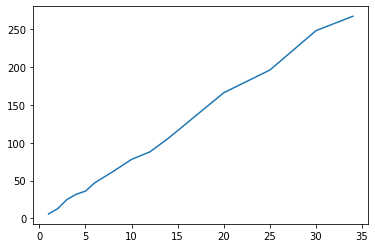

In [11]:
calib_s.plot(kind='line')

In [12]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

# Fitting volume from plunger position prediction

In [32]:
popt, pcov = curve_fit(f, calib_s.index, calib_s) # your data x, y to fit

In [33]:
popt

array([ 8.07539336, -2.55498252])

In [34]:
fit = pd.DataFrame({'measured':calib_s})

In [35]:
fit['predicted'] = calib_s.index * popt[0] + popt[1]

In [36]:
fit

,measured,predicted
1.0,6.0,5.520411
2.0,13.0,13.595804
3.0,25.0,21.671198
4.0,32.0,29.746591
5.0,36.0,37.821984
6.0,47.0,45.897378
8.0,62.0,62.048164
10.0,78.0,78.198951
12.0,88.0,94.349738
14.0,106.0,110.500524


# 3 Fitting plunger position from volume

In [37]:
popt, pcov = curve_fit(f, calib_s, calib_s.index) # your data x, y to fit

In [38]:
popt

array([0.12353872, 0.3457386 ])

In [39]:
fit['predicted_z'] = calib_s * popt[0] + popt[1]

In [40]:
fit

,measured,predicted,predicted_z
1.0,6.0,5.520411,1.086971
2.0,13.0,13.595804,1.951742
3.0,25.0,21.671198,3.434207
4.0,32.0,29.746591,4.298978
5.0,36.0,37.821984,4.793132
6.0,47.0,45.897378,6.152058
8.0,62.0,62.048164,8.005139
10.0,78.0,78.198951,9.981759
12.0,88.0,94.349738,11.217146
14.0,106.0,110.500524,13.440843


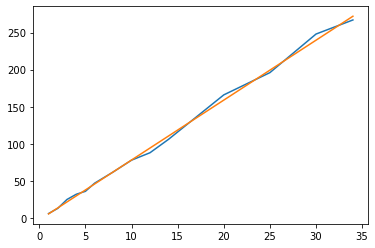

In [41]:
calib_s.plot(kind='line')
fit.predicted.plot()

# Fixing and testing bernielib

In [1]:
from datetime import datetime

import bernielib as bl

In [2]:
ber = bl.robot()

In [3]:
ber.home()

## Loading new data

In [5]:
# old data
ber.data

{'magnets_away_angle': 5.2,
 'magnets_near_tube_angle': 11.2,
 'stair_finding_step_list': [1, 0.2],
 'stair_finding_z_increment': 0.1,
 'stair_finding_z_retract_after_trigger': -1,
 'stair_finding_z_max_travel': 3,
 'stair_finding_z_load_threshold': 500,
 'z_max': 180,
 'x_max': 189,
 'y_max': 322,
 'added_tip_length': 41.6,
 'volume_to_position_slope': -0.15859245180518214,
 'volume_to_position_intercept': -0.958195131933648,
 'pipetting_delay': 0.2,
 'DNAsize_to_Vbeads': {'a': 0.499325349, 'b': -9.91043764, 'c': 25758.5836},
 'tip_drop_servo_up_angle': 2.5,
 'tip_drop_servo_down_angle': 7.3,
 'speed_XY': 50000,
 'speed_Z': 30000,
 'speed_pipette': 2500,
 'plunger_movement_when_dumping_tip': 35,
 'maximum_plunger_movement_coordinate': 35,
 'liquid_uptake_low_volume_bottom_offset': 0.2}

In [4]:
ber.setPipetteVolumeConstants(slope=0.12353872, intercept=0.3457386)

In [5]:
ber.calcPipettePositionFromVolume(200)

25.053482600000002

In [6]:
ber.calcPipettePositionFromVolume(10)

1.5811258000000001

In [7]:
ber.setVolumeFromPlungerPositionConstants(slope=8.07539336, intercept=-2.55498252)

In [8]:
ber.calcVolFromPipettePosition(25)

199.32985147999997

In [9]:
ber.calcVolFromPipettePosition(1.5)

9.55810752

## Adding functions for fitting the pipette calibration to the bernielib

In [2]:
from datetime import datetime

import bernielib as bl

ber = bl.robot()

In [3]:
ber.home()

In [4]:
ber.fitPipettePositionVsVolumeLine(calib_dict)

(0.12353871734335235, 0.34573859874557084)

In [5]:
ber.fitVolumeVsPipettePositionLine(calib_dict)

(8.07539335665879, -2.55498251749027)

In [6]:
ber.calibratePipette(calib_dict)

In [7]:
ber.data

{'magnets_away_angle': 5.2,
 'magnets_near_tube_angle': 11.2,
 'stair_finding_step_list': [1, 0.2],
 'stair_finding_z_increment': 0.1,
 'stair_finding_z_retract_after_trigger': -1,
 'stair_finding_z_max_travel': 3,
 'stair_finding_z_load_threshold': 500,
 'z_max': 180,
 'x_max': 189,
 'y_max': 322,
 'added_tip_length': 41.6,
 'volume_to_position_slope': 0.12353871734335235,
 'volume_to_position_intercept': 0.34573859874557084,
 'pipetting_delay': 0.2,
 'DNAsize_to_Vbeads': {'a': 0.499325349, 'b': -9.91043764, 'c': 25758.5836},
 'tip_drop_servo_up_angle': 2.5,
 'tip_drop_servo_down_angle': 7.3,
 'speed_XY': 50000,
 'speed_Z': 30000,
 'speed_pipette': 2500,
 'plunger_movement_when_dumping_tip': 35,
 'maximum_plunger_movement_coordinate': 35,
 'liquid_uptake_low_volume_bottom_offset': 0.2,
 'position_to_volume_slope': 8.07539335665879,
 'position_to_volume_intercept': -2.55498251749027}